In [856]:
class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        '''
        Initiates the class GameOfLife and creates a zero 2D list of dimention x_dim & y_dim.
        
        Parameters:
        x_dim: An Integer representing no. of rows.
        y_dim: An Integer representing no. of colums.
        
        Returns:
        Nothing
        '''
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.x_dim=x_dim
        self.y_dim=y_dim
        self.life_grid=[]
        for i in range(x_dim):
            col=[]
            for j in range(y_dim):
                col.append(0)
            self.life_grid.append(col)
        
    
    def get_grid(self):
        '''
        Returns the snapshot of current status of the 2D list.
        
        Parameters:
        None
        
        Returns:
        The snapshot of current status of the 2D list
        '''
        # Implement a getter method for your grid.
        return self.life_grid

    def print_grid(self):
        '''
        Prints a better representation of th 2D list
        
        Parameters:
        None
        
        Returns:
        Nothing
        '''
        
        # Implement a method to print out your grid in a human-readable format.
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                print(self.life_grid[i][j],end=' | ')
            print()
            print("- - "*self.y_dim)

    def populate_grid(self, coord):
        '''
        Populates the game grid with live cells at the specified coordinates.

        Parameters:
        coord: A list of tuples. Each tuple represents the (x, y) coordinates of a live cell.

        Returns:
        The updated life_grid with the new live cells.
        '''
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        self.coord=coord
        for k,v in self.coord:
            self.life_grid[k][v]=1            
        return self.life_grid

    def make_step(self):
        '''
        Takes the list 1 step forward according to the rules of the game.
        
        Parameters:
        None
        
        Returns:
        Snapshot of the 2D list after 1 step
        '''
        # Implement the logic to update the game state according to the rules of Conway's Game of Life.
        self.sum_grid=[]
        for i in range(self.x_dim):
            col=[]
            for j in range(self.y_dim):
                col.append(0)
            self.sum_grid.append(col)
        for i in range(self.x_dim):#0,1,2
            for j in range(self.y_dim):#0,1,2,3
                neighbors_sum=0
                for p in range(i-1,i+2):
                    if p<0 or p>self.x_dim-1:
                        pass
                    else:
                        for q in range(j-1,j+2):
                            if q<0 or (p==i and q==j) or q>self.y_dim-1:
                                pass
                            else:
                                neighbors_sum+=self.life_grid[p][q]
                self.sum_grid[i][j]=neighbors_sum
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                if self.sum_grid[i][j]<2 and self.life_grid[i][j]==1:
                    self.life_grid[i][j]=0
                elif (self.sum_grid[i][j]==2 or self.sum_grid[i][j]==3) and self.life_grid[i][j]==1:
                    self.life_grid[i][j]=1
                elif self.sum_grid[i][j]>3 and self.life_grid[i][j]==1:
                    self.life_grid[i][j]=0
                elif self.life_grid[i][j]==0 and self.sum_grid[i][j]==3:
                    self.life_grid[i][j]=1
        return self.life_grid
        

    def make_n_steps(self, n):
        '''
        Takes the list n steps forward.
        
        Parameter:
        An integer representing the number of steps.
        
        Returns:
        Snapshot of the 2D list after n steps.
        '''
        self.n=n
        # Implement a method that applies the make_step method n times.
        for i in range(self.n):
            self.make_step()
        return self.life_grid

    def draw_grid(self):
        '''
        Draws the gamified version of the 2D list.
        
        Parameter:
        None
        
        Returns:
        A scatter plot representing dead or alive cells in different colors.
        '''
        # Draw the current state of the grid.
        x=[]
        y=[]
        colors=[]
        for i in range(self.y_dim):
            for j in range(self.x_dim):
                x.append(j)
                y.append(i)
                if self.life_grid[i][j]==1:
                    colors.append('y')
                elif self.life_grid[i][j]==0:
                    colors.append('black')
        import matplotlib.pyplot as plt
        %matplotlib inline
#         fig, ax = plt.subplots()
               
        plt.scatter(x,y,c=colors,s=800,marker='s')
        plt.ylim(max(y)+1, min(y)-1)
        plt.xticks(range(min(x)-1, max(x)+2))
        plt.show()

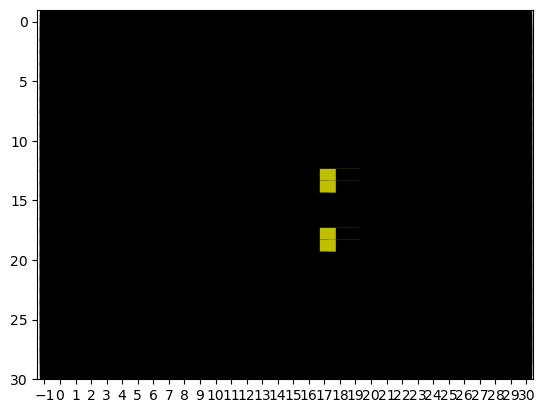

In [883]:
g=GameOfLife(30,30)
t=[(14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),(16, 14), (16, 15), (16, 17), (16, 18),(18, 14), (18, 15), (18, 17), (18, 18),(14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)]
g.populate_grid(t)
g.make_n_steps(5)

g.draw_grid()